In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [6]:
def rle_encode(data):
    encoding = ''
    prev_char = ''
    count = 1
    
    if not data : return ''
    for char in data:
        if char != prev_char:
            if prev_char:
                encoding += str(count) + prev_char
            count = 1
            prev_char = char
        else:
            count += 1
    else:
        encoding += str(count) + prev_char
        return encoding

In [13]:
def rle_decode(data):
    decode = ''
    count = ''
    for char in data:
        # If the character is numerical...
        if char.isdigit():
            # ...append it to our count
            count += char
        else:
            # Otherwise we've seen a non-numerical
            # character and need to expand it for
            # the decoding
            decode += char * int(count)
            count = ''
    return decode

In [7]:
rle_encode('AAAABBBBBBCCCCS')

'4A6B4C1S'

In [14]:
rle_decode('4A6B4C1S')

'AAAABBBBBBCCCCS'

In [9]:
def detect_5l(img,start,method,threshold=0.9):

    img2 = img.copy()
    res = cv.matchTemplate(img2,start,method)
    cv.normalize(res,res,0,1, norm_type=cv.NORM_MINMAX)
    

    loc = np.where(res > threshold)

    point_w = []
    point_h = []

    start_w,start_h = start.shape[::-1]
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img2, pt, (pt[0] + start_w, pt[1] + start_h), (0,0,255), 1)
        point_w.append(pt[0])
        point_h.append(pt[1])
    
    i = 1
    while i < len(point_h):
        prev = point_h[i-1]
        post = point_h[i]

        if (post-prev < 30):
            del point_h[i-1]
            del point_w[i-1]
        else:
            i += 1
    
    crops = []

    for i in range(len(point_h)):

        s = point_h[i]-start_h//2
        e = point_h[i]+start_h

        crops.append(img[s:e,point_w[i]+start_w:img.shape[1]])
    
    return img2, point_w, point_h, crops

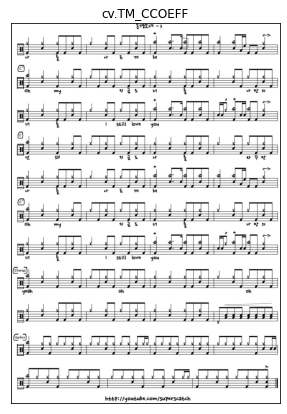

In [10]:
music_sheet = cv.imread('C:/Users/ADmin/Desktop/drum/music_sheet/'+'/6.jpg',0)

start = cv.imread('C:/Users/ADmin/Desktop/start.jpg',0)

meth = 'cv.TM_CCOEFF'
method = eval(meth)

img2, _, _, crops = detect_5l(music_sheet,start,method,0.9)
    
plt.figure(figsize=[10,7])
plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.title(meth)
plt.show()

In [11]:
crop_img = crops[4]

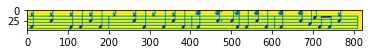

In [12]:
plt.imshow(crop_img)

In [101]:
_,music_sheet_bi = cv.threshold(music_sheet,0, 1, cv.THRESH_BINARY+cv.THRESH_OTSU)

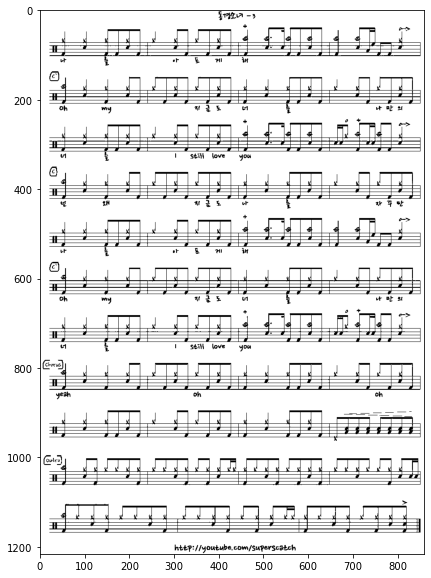

In [102]:
plt.figure(figsize=[20,10])
plt.imshow(music_sheet_bi,'gray')

In [105]:
a = np.sum(music_sheet_bi, axis=1)

In [106]:
a

array([860, 860, 860, ..., 858, 860, 860], dtype=uint32)

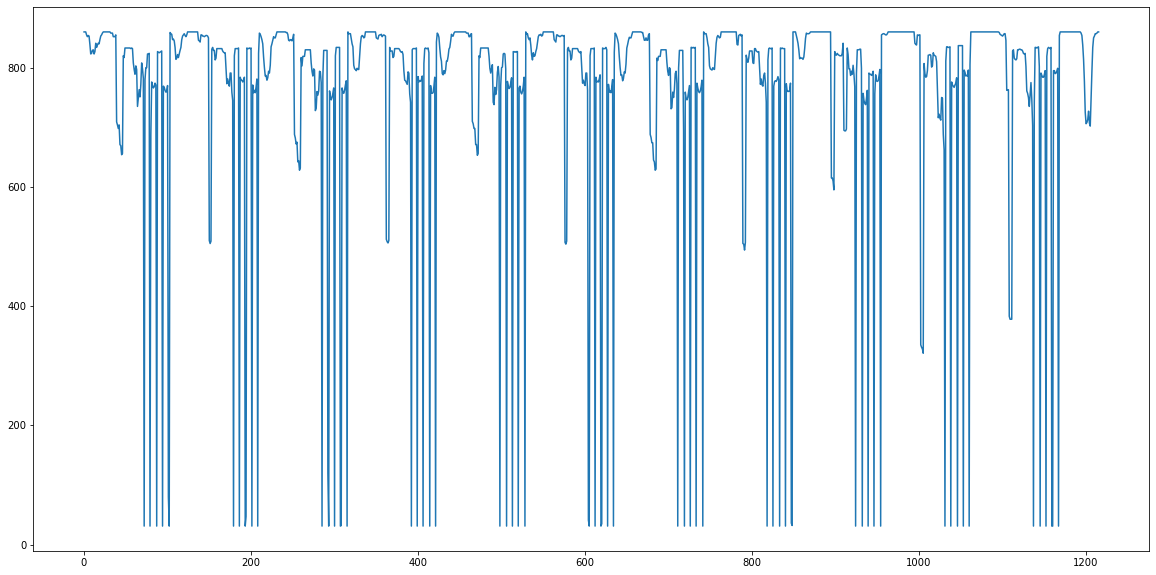

In [107]:
plt.figure(figsize=[20,10])
plt.plot(a)

In [113]:
a = np.float32(a)
a_norm = a.copy()

cv.normalize(a,a_norm,0,1, norm_type=cv.NORM_MINMAX)

array([1.        , 1.        , 1.        , ..., 0.99758744, 1.        ,
       1.        ], dtype=float32)

In [114]:
a_norm = 1-a_norm
peaks,_ = signal.find_peaks(a_norm, height=0.9)

([<matplotlib.lines.Line2D at 0x258aae4fe80>],
 [<matplotlib.lines.Line2D at 0x258aab374a8>])

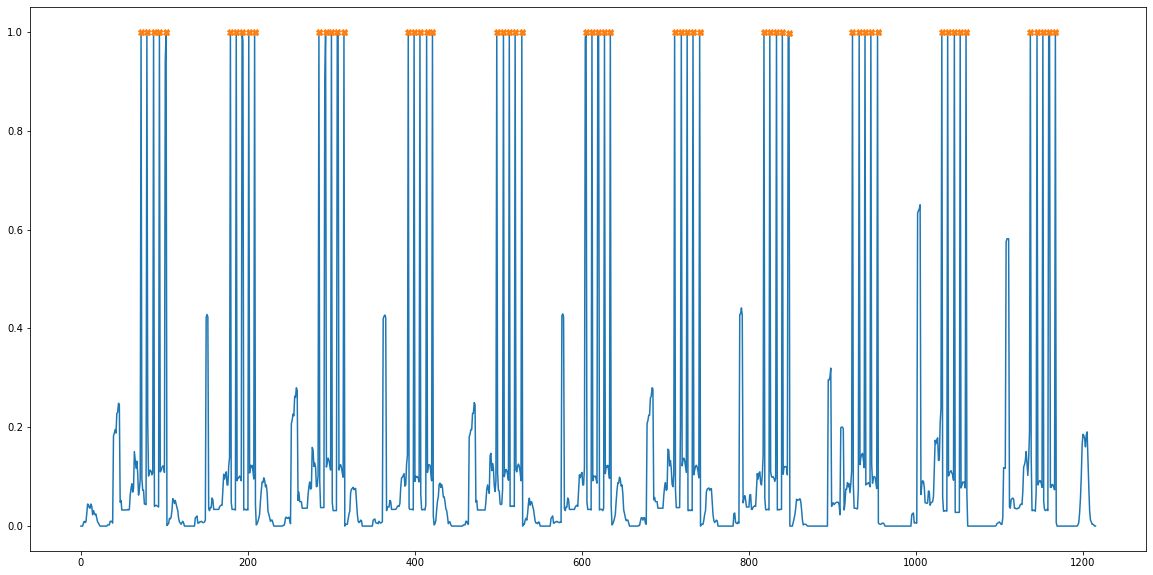

In [115]:
plt.figure(figsize=[20,10])
plt.plot(a_norm),plt.plot(peaks,a_norm[peaks],"X")

In [116]:
peaks.shape

(55,)